___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
#Adel Salimullin

In [48]:
import pandas as pd
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
import sklearn
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [49]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data Wrangling

In [50]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [51]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [52]:
df["Recommended IND"].value_counts(normalize=True) # checkign the values over 100 total

Recommended IND
1    0.822362
0    0.177638
Name: proportion, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [53]:
# slice and dice
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},inplace=True)
df.head()


,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [54]:
df= df[['text', 'label']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22641 non-null  object
 1   label   23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


---
---


### Missing Value Detection

In [55]:
# missing values
df.isna().sum()

text     845
label      0
dtype: int64

In [56]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22641 non-null  object
 1   label   22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


In [57]:
df.reset_index(drop=True, inplace=True)
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


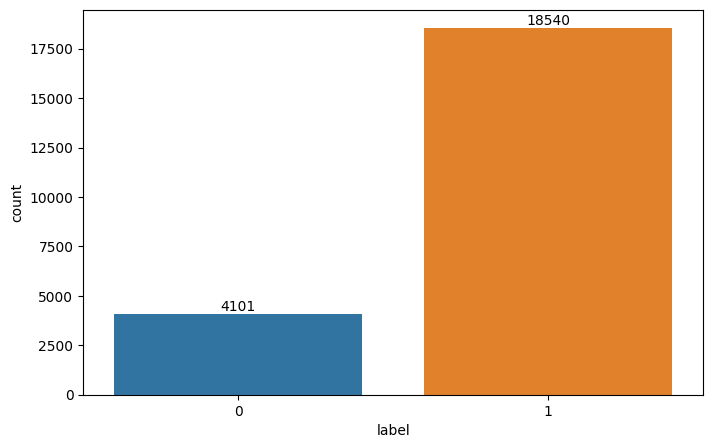

In [58]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="label", data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [59]:
stop_words = stopwords.words("english") #(for sentiment analysis, keep no, not)

for i in ["not", "no"]:
  stop_words.remove(i)

In [60]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


In [61]:
def cleaning(data):

    #1. Removing URLS
    # data = re.sub('http\S*', '', data).strip()
    # data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    # data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    # data = re.sub('@\S*', '', data).strip()

    # #4. Correction of text
    # spell=Speller(fast=True)
    # correction_data=spell(data)

    #5. Contraction of text
    # contraction_data=contractions.fix(correction_data)
    contraction_data=contractions.fix(data)

    #6. Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())
    # text_tokens = word_tokenize(correction_data.lower())

    #7. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #8. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #9. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #10. joining
    return " ".join(text_cleaned)

In [62]:
%%time
cleaning_text = df["text"].apply(cleaning)
cleaning_text.head()

CPU times: total: 11.7 s
Wall time: 13.3 s


0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

In [63]:
df["cleaned_text"] = cleaning_text
df

,text,label,cleaned_text
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
...,...,...,...
22636,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
22637,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
22638,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
22639,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [64]:
df_cld=df[["cleaned_text", "label"]]

In [65]:
positive_reviews = df_cld[df_cld['label'] == 1]
positive_reviews

,cleaned_text,label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1
...,...,...
22635,not sure ordering skirt could not see person f...,1
22636,happy snag dress great price easy slip flatter...,1
22637,reminds maternity clothes soft stretchy shiny ...,1
22639,bought dress wedding summer cute unfortunately...,1


In [66]:
negative_reviews = df_cld[df_cld['label'] == 0]
negative_reviews

,cleaned_text,label
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one not petite foot tal...,0
10,dress run small esp zipper area run ordered sp...,0
22,first not pullover styling side zipper would n...,0
25,loved material not really look long dress purc...,0
...,...,...
22606,tried color really pretty fun want pair pant l...,0
22607,wanted love jacket soft great color unfortunat...,0
22617,purchased good price typically love maeve fabr...,0
22634,surprised positive review product terrible cut...,0


### Collect Words (positive and negative separately)

In [67]:
recommended_words = ' '.join(positive_reviews['cleaned_text'])

In [68]:
not_recommended_words = ' '.join(negative_reviews['cleaned_text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

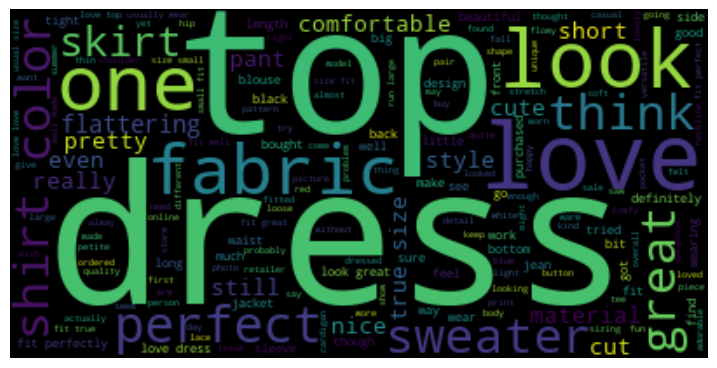

In [69]:
# Create word cloud for recommended reviews
recommended_wordcloud = WordCloud().generate(recommended_words)
plt.imshow(recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


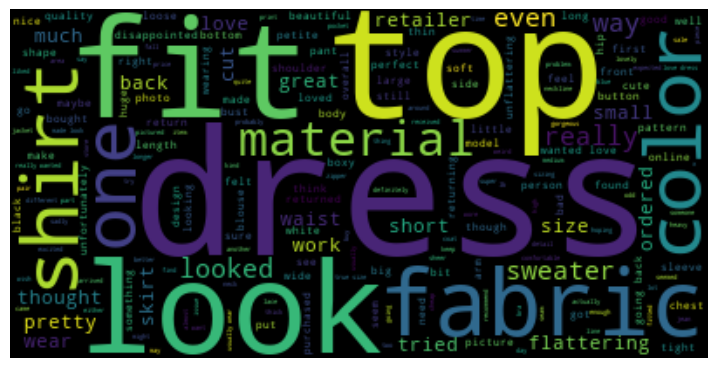

In [70]:
# Create word cloud for not recommended reviews
not_recommended_wordcloud = WordCloud().generate(not_recommended_words)
plt.imshow(not_recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [71]:
df2=df[["text", "label"]]

In [72]:
df2.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [73]:
X = df2["text"]
y = df2["label"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [75]:
%%time
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)


CPU times: total: 12 s
Wall time: 13.5 s


In [76]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,...,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youthful,yr,yuck,yucky,yummy,zag,zero,zig,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [78]:
%%time
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.95)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

CPU times: total: 12.3 s
Wall time: 13.1 s


In [79]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,...,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youthful,yr,yuck,yucky,yummy,zag,zero,zig,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [80]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [81]:
#simpler


## Logistic Regression

### CountVectorizer

In [82]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score


In [83]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [84]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[ 538   77]
 [ 391 2391]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.70       615
           1       0.97      0.86      0.91      2782

    accuracy                           0.86      3397
   macro avg       0.77      0.87      0.80      3397
weighted avg       0.90      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3486
           1       0.97      0.86      0.92     15758

    accuracy                           0.87     19244
   macro avg       0.78      0.88      0.81     19244
weighted avg       0.90      0.87      0.88     19244



In [85]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.846551
train_accuracy     0.857826
test_f1            0.900392
train_f1           0.907615
test_recall        0.847318
train_recall       0.852879
test_precision     0.960665
train_precision    0.969859
dtype: float64

In [86]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.875858
train_accuracy     0.887451
test_f1            0.927505
train_f1           0.934135
test_recall        0.969730
train_recall       0.974672
test_precision     0.888835
train_precision    0.896836
dtype: float64

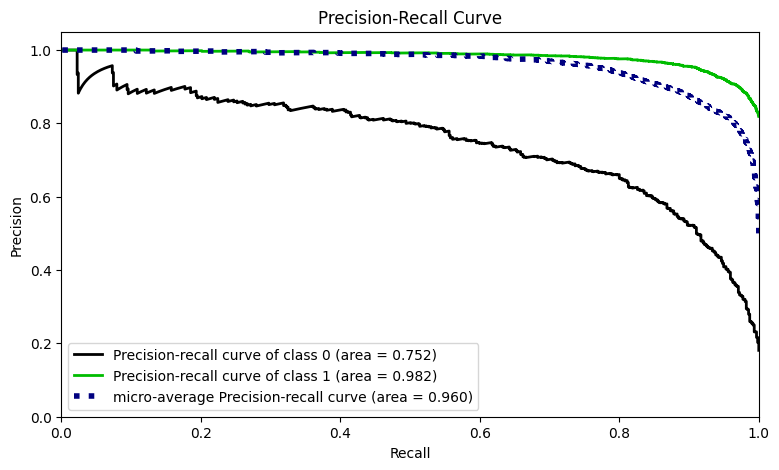

In [87]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [88]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [89]:
log = LogisticRegression(C=0.02, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [90]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[ 540   75]
 [ 475 2307]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.88      0.66       615
           1       0.97      0.83      0.89      2782

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.85      3397

Train_Set
              precision    recall  f1-score   support

           0       0.52      0.87      0.65      3486
           1       0.97      0.82      0.89     15758

    accuracy                           0.83     19244
   macro avg       0.74      0.85      0.77     19244
weighted avg       0.89      0.83      0.85     19244



In [91]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.818853
train_accuracy     0.818853
test_f1            0.900406
train_f1           0.900406
test_recall        1.000000
train_recall       1.000000
test_precision     0.818853
train_precision    0.818853
dtype: float64

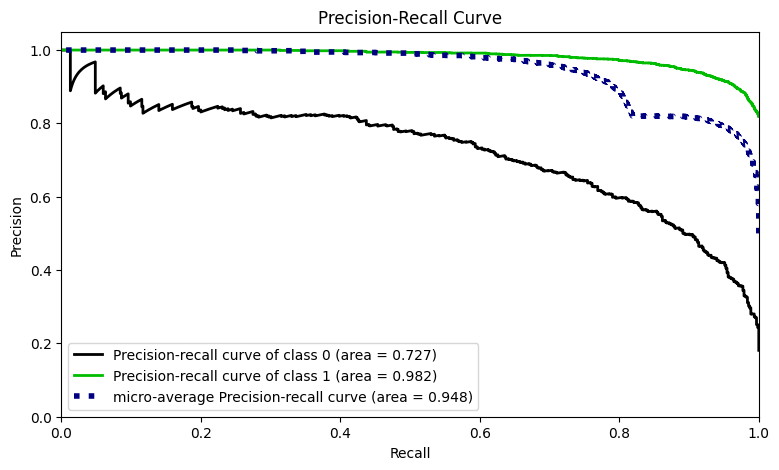

In [92]:
model = LogisticRegression(C=0.02, max_iter=1000)
model.fit(X_train_tf_idf, y_train)
y_pred_proba = model.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [93]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Naive Bayes 

### Countvectorizer

In [94]:
nb = BernoulliNB(alpha=1)  
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [95]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 448  167]
 [ 228 2554]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       615
           1       0.94      0.92      0.93      2782

    accuracy                           0.88      3397
   macro avg       0.80      0.82      0.81      3397
weighted avg       0.89      0.88      0.89      3397

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      3486
           1       0.95      0.92      0.93     15758

    accuracy                           0.89     19244
   macro avg       0.81      0.85      0.83     19244
weighted avg       0.90      0.89      0.90     19244



In [96]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.874092
train_accuracy         0.894657
test_precision-neg     0.632625
train_precision-neg    0.680705
test_recall-neg        0.728070
train_recall-neg       0.788169
test_f1-neg            0.676901
train_f1-neg           0.730504
dtype: float64

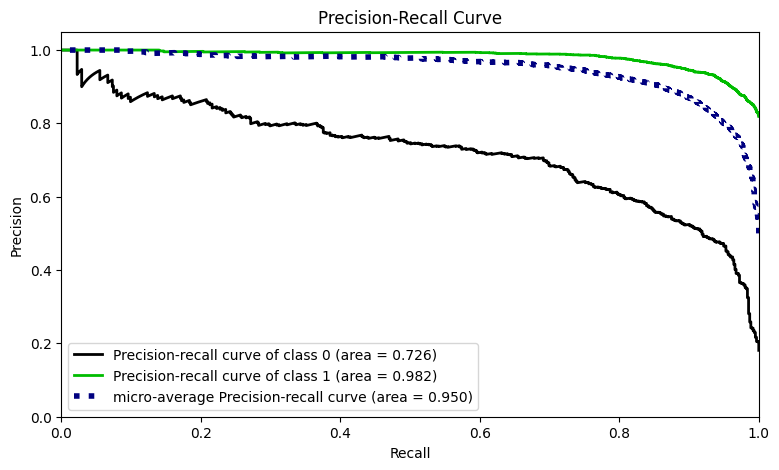

In [97]:
model = BernoulliNB(alpha=1)
model.fit(X_train_count, y_train)
y_pred_proba = model.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [98]:
y_test_dummies = pd.get_dummies(y_test)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

In [99]:
average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

0.7256810774836737

### TF-IDF

In [100]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1)

In [101]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 448  167]
 [ 228 2554]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       615
           1       0.94      0.92      0.93      2782

    accuracy                           0.88      3397
   macro avg       0.80      0.82      0.81      3397
weighted avg       0.89      0.88      0.89      3397

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      3486
           1       0.95      0.92      0.93     15758

    accuracy                           0.89     19244
   macro avg       0.81      0.85      0.83     19244
weighted avg       0.90      0.89      0.90     19244



In [102]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.874092
train_accuracy         0.894657
test_precision-neg     0.632625
train_precision-neg    0.680705
test_recall-neg        0.728070
train_recall-neg       0.788169
test_f1-neg            0.676901
train_f1-neg           0.730504
dtype: float64

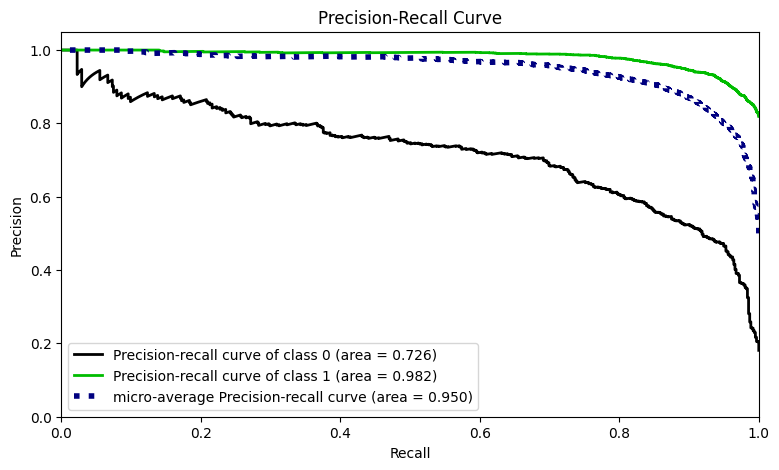

In [103]:
model = BernoulliNB(alpha=1)
model.fit(X_train_tf_idf, y_train)
y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [104]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Support Vector Machine (SVM)

### Countvectorizer

In [105]:
from sklearn.svm import LinearSVC   #import LinearSVC
svc = LinearSVC(C=0.1, class_weight="balanced") #, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced") #hedef class 0 oldugu icin balanced dedim, eger 1 olsaydi gerek yoktu
svc.fit(X_train_count,y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [106]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 489  126]
 [ 316 2466]]
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       615
           1       0.95      0.89      0.92      2782

    accuracy                           0.87      3397
   macro avg       0.78      0.84      0.80      3397
weighted avg       0.89      0.87      0.88      3397

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      3486
           1       0.99      0.92      0.95     15758

    accuracy                           0.93     19244
   macro avg       0.86      0.94      0.89     19244
weighted avg       0.94      0.93      0.93     19244



In [107]:
model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.863128
train_accuracy         0.930714
test_precision-neg     0.593686
train_precision-neg    0.734233
test_recall-neg        0.778564
train_recall-neg       0.967904
test_f1-neg            0.673430
train_f1-neg           0.835022
dtype: float64

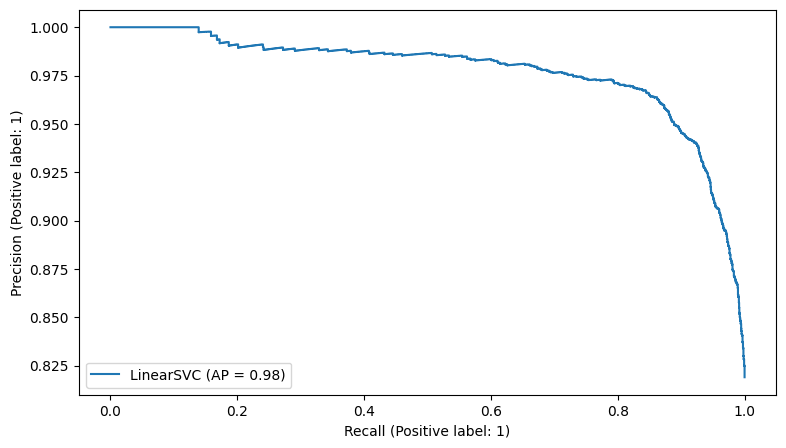

In [108]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [109]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [110]:
svc = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [111]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 536   79]
 [ 366 2416]]
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.87      0.71       615
           1       0.97      0.87      0.92      2782

    accuracy                           0.87      3397
   macro avg       0.78      0.87      0.81      3397
weighted avg       0.90      0.87      0.88      3397

Train_Set
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      3486
           1       0.98      0.88      0.93     15758

    accuracy                           0.89     19244
   macro avg       0.81      0.90      0.84     19244
weighted avg       0.92      0.89      0.90     19244



In [112]:
model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.861310
train_accuracy         0.889599
test_precision-neg     0.580516
train_precision-neg    0.632631
test_recall-neg        0.850282
train_recall-neg       0.931568
test_f1-neg            0.689756
train_f1-neg           0.753527
dtype: float64

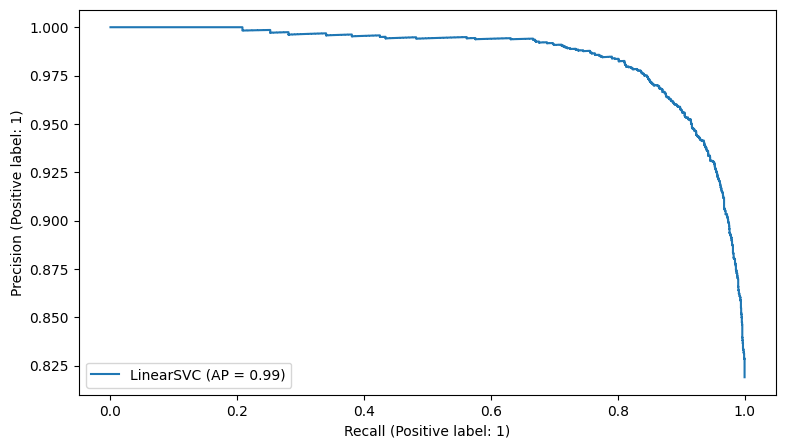

In [113]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [114]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [115]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [116]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 348  267]
 [ 119 2663]]
Test_Set
              precision    recall  f1-score   support

           0       0.75      0.57      0.64       615
           1       0.91      0.96      0.93      2782

    accuracy                           0.89      3397
   macro avg       0.83      0.76      0.79      3397
weighted avg       0.88      0.89      0.88      3397

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3486
           1       0.99      0.99      0.99     15758

    accuracy                           0.98     19244
   macro avg       0.97      0.98      0.97     19244
weighted avg       0.98      0.98      0.98     19244



In [117]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.838703
train_accuracy         0.935351
test_precision-neg     0.904343
train_precision-neg    0.999951
test_recall-neg        0.122485
train_recall-neg       0.643144
test_f1-neg            0.215548
train_f1-neg           0.782782
dtype: float64

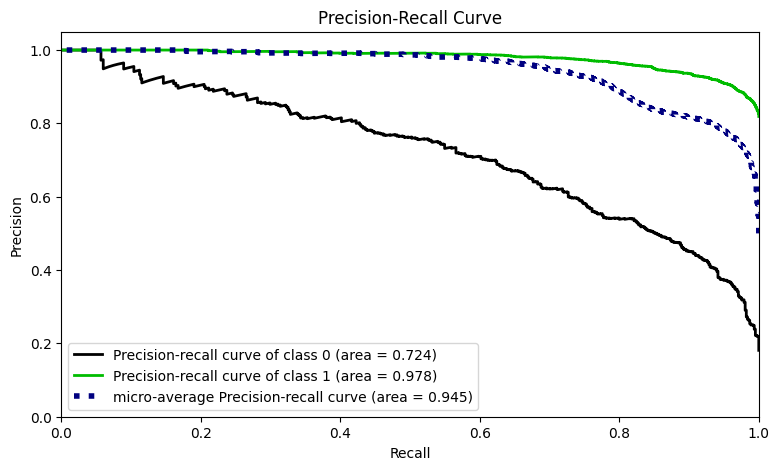

In [118]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [119]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [120]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [121]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 328  287]
 [ 117 2665]]
Test_Set
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       615
           1       0.90      0.96      0.93      2782

    accuracy                           0.88      3397
   macro avg       0.82      0.75      0.77      3397
weighted avg       0.87      0.88      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3486
           1       1.00      0.99      0.99     15758

    accuracy                           0.99     19244
   macro avg       0.97      0.99      0.98     19244
weighted avg       0.99      0.99      0.99     19244



In [122]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.838028
train_accuracy         0.931142
test_precision-neg     0.890670
train_precision-neg    1.000000
test_recall-neg        0.119922
train_recall-neg       0.619877
test_f1-neg            0.210939
train_f1-neg           0.765292
dtype: float64

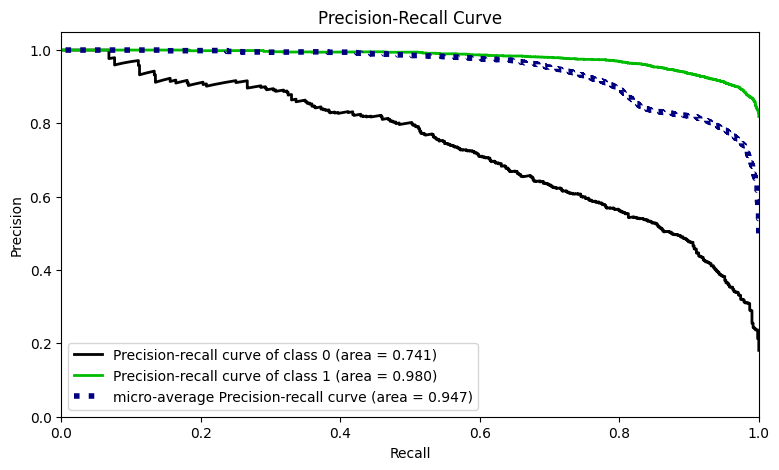

In [123]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [124]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Ada Boosting

### Countvectorizer

In [125]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [126]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 346  269]
 [ 134 2648]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       615
           1       0.91      0.95      0.93      2782

    accuracy                           0.88      3397
   macro avg       0.81      0.76      0.78      3397
weighted avg       0.87      0.88      0.88      3397

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3486
           1       0.93      0.96      0.94     15758

    accuracy                           0.91     19244
   macro avg       0.86      0.81      0.83     19244
weighted avg       0.90      0.91      0.90     19244



In [127]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.877937
train_accuracy         0.909184
test_precision-neg     0.697670
train_precision-neg    0.802217
test_recall-neg        0.576308
train_recall-neg       0.661822
test_f1-neg            0.631070
train_f1-neg           0.725280
dtype: float64

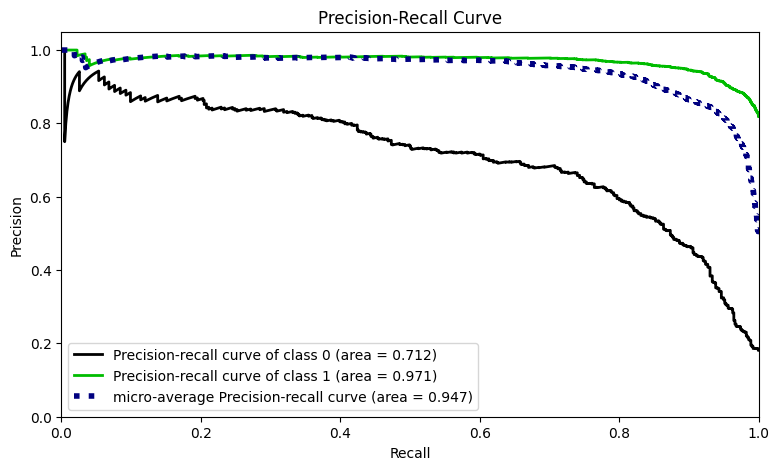

In [128]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [129]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [130]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [131]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL


[[ 357  258]
 [ 158 2624]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       615
           1       0.91      0.94      0.93      2782

    accuracy                           0.88      3397
   macro avg       0.80      0.76      0.78      3397
weighted avg       0.87      0.88      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      3486
           1       0.94      0.97      0.95     15758

    accuracy                           0.92     19244
   macro avg       0.88      0.84      0.86     19244
weighted avg       0.92      0.92      0.92     19244



In [132]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.874507
train_accuracy         0.921153
test_precision-neg     0.681279
train_precision-neg    0.826057
test_recall-neg        0.577182
train_recall-neg       0.715401
test_f1-neg            0.624722
train_f1-neg           0.766750
dtype: float64

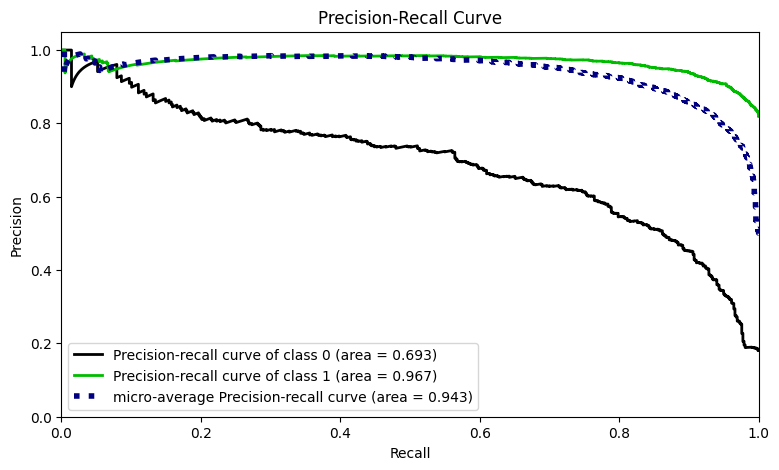

In [133]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [134]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## DL modeling

In [135]:
#import fun
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [136]:
df

,text,label,cleaned_text
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
...,...,...,...
22636,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
22637,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
22638,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
22639,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


In [137]:
df.text=df.text.apply(lambda x: contractions.fix(x))

In [138]:
X = df['text']
y = df['label'].map({1:0, 0:1})

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, stratify=y,random_state=101)

### Tokenization

In [140]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [141]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [142]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'it': 3,
 'and': 4,
 'a': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'not': 10,
 'but': 11,
 'on': 12,
 'for': 13,
 'of': 14,
 'was': 15,
 'with': 16,
 'so': 17,
 'am': 18,
 'my': 19,
 'dress': 20,
 'that': 21,
 'have': 22,
 'love': 23,
 'size': 24,
 'very': 25,
 'are': 26,
 'top': 27,
 'fit': 28,
 'like': 29,
 'be': 30,
 'as': 31,
 'me': 32,
 'wear': 33,
 'great': 34,
 'would': 35,
 'too': 36,
 'or': 37,
 'you': 38,
 'just': 39,
 'they': 40,
 'up': 41,
 'fabric': 42,
 'at': 43,
 'small': 44,
 'color': 45,
 'will': 46,
 'look': 47,
 'more': 48,
 'if': 49,
 'really': 50,
 'ordered': 51,
 'perfect': 52,
 'little': 53,
 'one': 54,
 'these': 55,
 'flattering': 56,
 'did': 57,
 'well': 58,
 'an': 59,
 'soft': 60,
 'do': 61,
 'out': 62,
 'because': 63,
 'back': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'cute': 68,
 'comfortable': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'all': 74,
 'when': 75,
 'large': 76,
 'looks': 77,
 'bit': 78,
 'fits': 79,
 

In [143]:
len(tokenizer.word_index)

14136

### Converting tokens to numeric

In [144]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)

In [145]:
num_tokens = [len(tokens) for tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [146]:
num_tokens.max()

118

In [147]:
max_tokens = 118

### Fixing token counts of all documents (pad_sequences)

In [148]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")

In [149]:
display(X_train_pad.shape)
display(X_test_pad.shape)

(20376, 118)

(2265, 118)

### Modeling

In [150]:
model = Sequential()

In [151]:
embedding_size = 50

In [152]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [153]:
optimizer = Adam(learning_rate=0.001)

In [154]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [155]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 118, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 118, 50)           0         
                                                                 
 gru (GRU)                   (None, 118, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 118, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 118, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 118, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [157]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([2.76022758, 0.61060833])

In [158]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=128,
          sample_weight=classes_weights,
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10


160/160 [==============================] - 27s 137ms/step - loss: 0.4877 - recall: 0.7532 - val_loss: 0.3401 - val_recall: 0.8268
Epoch 2/10
160/160 [==============================] - 21s 131ms/step - loss: 0.3015 - recall: 0.9068 - val_loss: 0.3190 - val_recall: 0.8659
Epoch 3/10
160/160 [==============================] - 21s 132ms/step - loss: 0.2465 - recall: 0.9344 - val_loss: 0.3290 - val_recall: 0.8561
Epoch 4/10
160/160 [==============================] - 21s 133ms/step - loss: 0.2086 - recall: 0.9510 - val_loss: 0.3044 - val_recall: 0.7585
Epoch 4: early stopping


### Model Evaluation

In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.487685,0.753183,0.340138,0.826829
1,0.301481,0.906800,0.319037,0.865854
2,0.246532,0.934435,0.329007,0.856098
3,0.208596,0.950962,0.304450,0.758537


<Axes: >

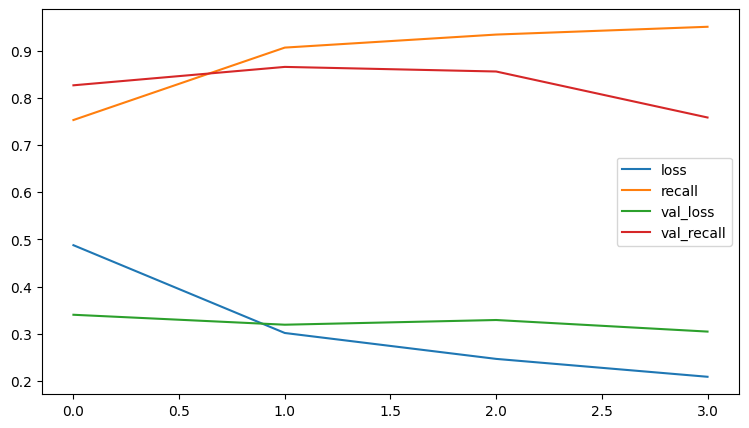

In [160]:
model_loss.plot()

In [161]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 2s 16ms/step
[[1620  235]
 [  55  355]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1855
           1       0.60      0.87      0.71       410

    accuracy                           0.87      2265
   macro avg       0.78      0.87      0.81      2265
weighted avg       0.90      0.87      0.88      2265



In [162]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

  1/637 [..............................] - ETA: 25s

637/637 [==============================] - 10s 16ms/step
[[14819  1866]
 [  183  3508]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16685
           1       0.65      0.95      0.77      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.92      0.85     20376
weighted avg       0.93      0.90      0.91     20376



 1/71 [..............................] - ETA: 2s

71/71 [==============================] - 1s 18ms/step


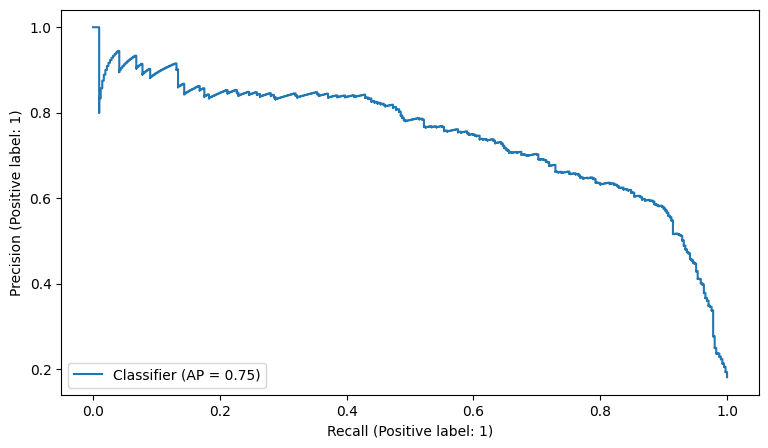

In [163]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [164]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

### Tokenization

In [165]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [166]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Fixing token counts of all documents

In [167]:
train_sentence_tokens = tokenizer(list(X_train),
                                  max_length=162,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

In [168]:
np.array(train_sentence_tokens['input_ids'])

array([[  101,  4149,  2023, ...,     0,     0,     0],
       [  101,  2023,  2327, ...,     0,     0,     0],
       [  101,  1045,  2359, ...,     0,     0,     0],
       ...,
       [  101,  5356, 13759, ...,     0,     0,     0],
       [  101,  1045,  7078, ...,     0,     0,     0],
       [  101,  1045,  4156, ...,     0,     0,     0]])

In [169]:
np.array(train_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [170]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  sentence_tokens = tokenizer(list(X),
                              max_length=seq_len,
                              truncation=True,
                              padding='max_length',
                              add_special_tokens=True)

  return np.array(sentence_tokens['input_ids']), np.array(sentence_tokens['attention_mask'])

In [171]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [172]:
Xids_train

array([[  101,  4149,  2023, ...,     0,     0,     0],
       [  101,  2023,  2327, ...,     0,     0,     0],
       [  101,  1045,  2359, ...,     0,     0,     0],
       ...,
       [  101,  5356, 13759, ...,     0,     0,     0],
       [  101,  1045,  7078, ...,     0,     0,     0],
       [  101,  1045,  4156, ...,     0,     0,     0]])

In [173]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [174]:
y_train=np.array(y_train)
y_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [176]:
y_test=np.array(y_test)
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [177]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

### Transformation Matrix to Tensorflow tensor

In [178]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [179]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [180]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [181]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Batch Size

In [182]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [183]:
pip install tf-models-official

  Using cached tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached Cython-3.0.6-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Using cached google_api_python_client-2.111.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached immutabledict-4.0.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached pycocotools-2.0.7-cp311-cp311-win_amd64.whl.metadata (1.1 kB)
  Using cached sacrebleu-2.4.0-py3-none-any.whl.metadata (57 kB)
  Using cached sentencepiece-0.1.99-cp311-cp311-win_amd64.whl (977 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (s

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      running egg_info
      writing lib3\PyYAML.egg-info\PKG-INFO
      writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
      writing top-level names to lib3\PyYAML.egg-info\top_level.txt
      Traceback (most recent call last):
        File "c:\Users\Adel\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Adel\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Adel\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\

In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [185]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

In [187]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [ ]:
model3.summary()

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

### Model Fiting

### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

In [ ]:
model_loss.plot()

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [217]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],

                        "F1_Score": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1, rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg,
                                     log_tfidf_f1_neg, svc_tfidf_f1, rf_tfidf_f1_neg, ada_tfidf_f1_neg, DL_f1],

                        "Recall_Score": [nb_count_rec_neg, log_count_rec_neg, svc_count_rec, rf_count_rec_neg, ada_count_rec_neg, nb_tfidf_rec_neg,
                                         log_tfidf_rec_neg, svc_tfidf_rec, rf_tfidf_rec_neg, ada_tfidf_rec_neg, DL_rec],

                        "Average_Precision_Score": [nb_AP_neg, log_AP_neg, svc_AP_count, rf_AP_neg, ada_AP_neg, nb_tfidf_AP_neg,
                                                    log_tfidf_AP_neg, svc_AP_tfidf, rf_tfidf_AP_neg, ada_tfidf_AP_neg, DL_AP]})



In [218]:
compare.F1_Score = compare.F1_Score.astype("float")
compare.Recall_Score = compare.Recall_Score.astype("float")
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    11 non-null     object 
 1   F1_Score                 11 non-null     float64
 2   Recall_Score             11 non-null     float64
 3   Average_Precision_Score  11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 484.0+ bytes


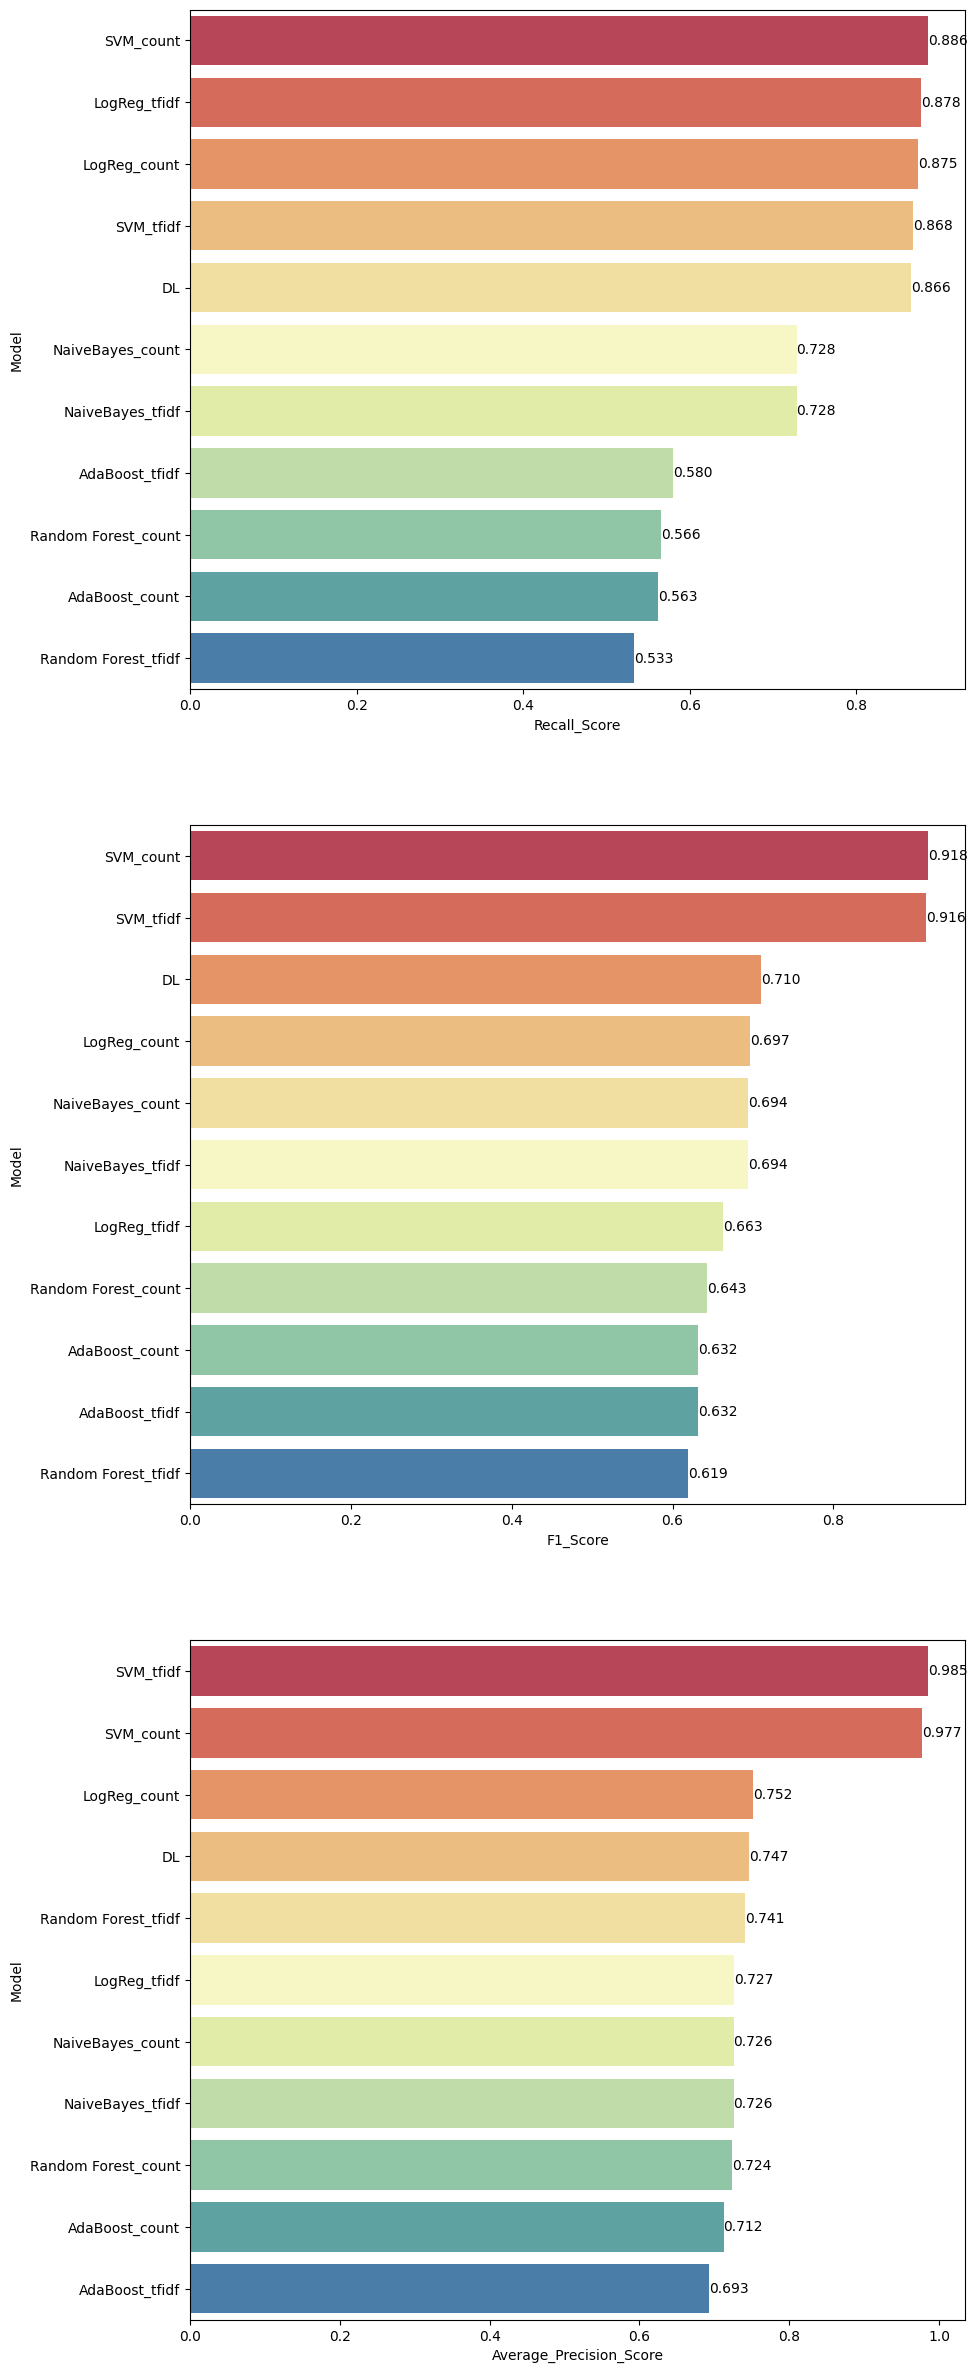

In [222]:
#plot
plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Spectral")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Spectral")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Spectral")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

In [ ]:
# could not solve the pip installation issue

### Conclusion

In [ ]:
#SVM is the best option for the sentiment analysis for the current dataset
#Per Aspera Ad Astra

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___